## 初始化

In [6]:
from pyspark.sql import SparkSession
from datetime import datetime, date
import pandas as pd
from pyspark.sql import Row

spark = SparkSession.builder.getOrCreate()
spark.conf.set('spark.sql.repl.eagerEval.enabled', True)

22/10/25 16:39:55 WARN Utils: Your hostname, XunyiJiangdeMacBook-Air.local resolves to a loopback address: 127.0.0.1; using 10.12.7.110 instead (on interface en0)
22/10/25 16:39:55 WARN Utils: Set SPARK_LOCAL_IP if you need to bind to another address


Setting default log level to "WARN".
To adjust logging level use sc.setLogLevel(newLevel). For SparkR, use setLogLevel(newLevel).


22/10/25 16:39:56 WARN NativeCodeLoader: Unable to load native-hadoop library for your platform... using builtin-java classes where applicable


## Get data

In [7]:
us_covid = spark.read.csv('../data/us_covid.csv',header=True)


## Overview

In [8]:
us_covid.select('cases','deaths').summary()
us_covid.columns
us_covid.dtypes

## change string into int
from pyspark.sql.types import IntegerType
from pyspark.sql.functions import col
us_covid = us_covid.withColumn('cases',us_covid.cases.cast(IntegerType()))
us_covid = us_covid.withColumn('deaths', us_covid.deaths.cast(IntegerType()))
us_covid.dtypes

[('date', 'string'),
 ('county', 'string'),
 ('state', 'string'),
 ('cases', 'int'),
 ('deaths', 'int')]

<AxesSubplot:>

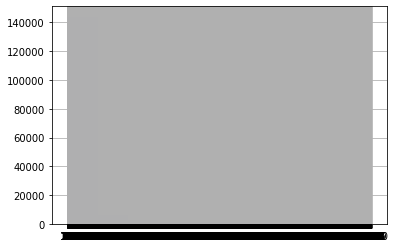

In [17]:
#pd.plotting.hist_series(us_covid.select('cases').toPandas())
#us_covid.select('cases')

In [20]:
us_covid.select(['date', 'county', 'state', 'cases', 'deaths']).isEmpty()
type()

False

## 3.3 统计截止5.19日，美国各州的累计确诊人数和死亡人数，并可视化展示。


In [10]:
us_covid.groupby('state').sum('cases','deaths').write.csv('results/result3',header = True)

## 3.4 统计截止5.19日，美国确诊人数最多的十个州，并可视化展示。

In [12]:
state_count = us_covid.groupBy('state').sum('cases')
state_count

state,sum(cases)
Utah,205581
Hawaii,28266
Minnesota,282491
Ohio,755119
Northern Mariana ...,689
Oregon,115862
Arkansas,134312
Texas,1282385
North Dakota,44513
Pennsylvania,1970295


In [16]:
state_count.orderBy(['sum(cases)'],ascending = False).write.csv('results/result4')

In [23]:
from pywebio.output import put_html
from pywebio.output import use_scope
from pyecharts.charts import WordCloud
from pyecharts.globals import SymbolType
from pyecharts import options as opts
from pywebio.output import put_text
from pywebio.output import put_table
from pywebio.output import toast
from pywebio.output import put_image
from pywebio.output import put_markdown
from pywebio.output import put_file
from pywebio.output import popup
from pywebio.output import put_html
from pywebio.output import put_loading
from pywebio.output import put_collapse
from pywebio.output import scroll_to
from pywebio.output import clear
from pywebio.output import put_code
def drawChart_4(index):
    root = "results/result" + str(index) +"/part-00000-2ffd8404-8b39-4315-9323-a0096f094496-c000.csv"
    data = []
    cnt = 0
    with open(root, 'r') as f:
        while cnt < 10:
            cnt += 1
            line = f.readline()
            row = line.split(',')
            data.append(row)

    c = (
    WordCloud()
    .add("", data, word_size_range=[20, 100], shape=SymbolType.DIAMOND)
    .set_global_opts(title_opts=opts.TitleOpts(title="美国各州确诊Top10"))
    #.render("results_pics/result4.html")
    )
    c.width = "100%"
    put_html(c.render_notebook()) #通过 put_html() 嵌入 PyWebIO 中


@use_scope('content', clear=True)
def show_demo(name):
    if name not in t(all_demos, all_demos_zh):
        return

    with use_scope('loading'):
        put_text('Loading...')
        put_loading()

    base_dir = path.join(src_path, name)
    files = os.listdir(base_dir)
    for file in files:
        if not file.endswith('.py'):
            continue
        name = file[:-len(".py")]

        html_file = path.join(base_dir, 'output', name) + '.html'
        try:
            code = open(path.join(base_dir, file)).read()
            html = open(html_file).read()
        except:
            continue

        put_html(html)

        # todo: if there is `open` calls, provide the file link
        put_collapse(t('Show source code', '查看源码'), put_code(code, 'python'))

    scroll_to(position='top')
    clear('loading')


In [24]:
drawChart_4(4)

## PyWebIO Learn

In [2]:
from pywebio.output import put_text
from pywebio.output import put_table
from pywebio.output import toast
from pywebio.output import put_image
from pywebio.output import put_markdown
from pywebio.output import put_file
from pywebio.output import popup
from pywebio.output import put_html
# Text Output


def test():
    put_text("Hello world!").show()

    # Table Output
    put_table([
        ['Commodity', 'Price'],
        ['Apple', '5.5'],
        ['Banana', '7'],
    ])

    # # Image Output
    # put_image(open('/path/to/some/image.png', 'rb').read())  # local image 
    # put_image('http://example.com/some-image.png')  # internet image 

    # HTML output
    html = open('results_pics/result4.html').read()
    put_html(html)

    # Markdown Output
    put_markdown('~~Strikethrough~~')

    # File Output
    put_file('hello_word.txt', b'hello word!')

    # Show a PopUp
    popup('popup title', 'popup text content')

    # Show a notification message
    toast('New message 🔔')


In [2]:
from pywebio.output import put_buttons
put_table([
    ['Type', 'Content'],
    ['html', put_html('X<sup>2</sup>')],
    ['text', '<hr/>'],  # equal to ['text', put_text('<hr/>')]
    ['buttons', put_buttons(['A', 'B'], onclick=put_text)],  
    ['markdown', put_markdown('`Awesome PyWebIO!`')],
    ['file', put_file('hello.text', b'hello world')],
    ['table', put_table([['A', 'B'], ['C', 'D']])]
])

In [3]:
from pywebio import *

def main():  # PyWebIO application function
    name = input.input("what's your name")
    output.put_text("hello", name)
    put_text("Hello world!").show()

    # Table Output
    put_table([
        ['Commodity', 'Price'],
        ['Apple', '5.5'],
        ['Banana', '7'],
    ])

    # # Image Output
    # put_image(open('/path/to/some/image.png', 'rb').read())  # local image 
    # put_image('http://example.com/some-image.png')  # internet image 

    # HTML output
    html = open('results_pics/result4.html').read()
    put_html(html)

    # Markdown Output
    put_markdown('~~Strikethrough~~')

    # File Output
    put_file('hello_word.txt', b'hello word!')

    # Show a PopUp
    popup('popup title', 'popup text content')

    # Show a notification message
    toast('New message 🔔')

start_server(main, port=8080, debug=True)

OSError: [Errno 48] Address already in use

In [4]:
start_server(test,port=8080, debug=True)

OSError: [Errno 48] Address already in use